# Working with Audio in Python

## Import Library yang Digunakan

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import wave

**Penjelasan:**
- `import numpy as np` : Library numpy digunakan untuk melakukan operasi matematika pada array.
- `import matplotlib.pyplot as plt` : Library matplotlib digunakan untuk membuat plot grafik.
- `import os` : Library os digunakan untuk melakukan operasi pada sistem operasi seperti misalnya membaca file.
- `import wave` : Library wave digunakan untuk membaca file audio.

## Memuat File Audio

Sumber audio .wav didapat dari : [tautan kaggle berikut ini](https://www.kaggle.com/datasets/pavanelisetty/sample-audio-files-for-speech-recognition?resource=download)

In [3]:
file_path = os.path.join(os.getcwd(), 'data', 'harvard.wav')
# Cara lain, namun tidak di rekomendasikan:
# file_path = "/Users/martinmanullang/Developer/if4021-handson/data/harvard.wav"

# Mengecek apakah file ada atau tidak
if not os.path.exists(file_path):
    print(f"File {file_path} not found.")
    exit()

File c:\Users\User\Documents\Multimedia\if4021-handson\2024\data\harvard.wav not found.


: 

memuat audio menggunakan library `wave`

In [3]:
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    
    # informasi channel
    n_channels = wav_file.getnchannels()


**Penjelasan:**
- `wave.open` : digunakan untuk membuka file audio.
- `r` adalah mode pembacaan file audio. `r` berarti read.
- kita mengkombinasikannya dengan `with` dan `as` agar file audio tertutup secara otomatis setelah selesai digunakan.
- `frames = wav_file.readframes(-1)`
    - `readframes(-1)` : digunakan untuk membaca semua frame audio.
- `np.frombuffer` : digunakan untuk mengubah frame audio menjadi array numpy.
    - `dtype='int16'` : digunakan untuk menentukan tipe data array numpy. Dalam hal ini, audio akan diubah menjadi array dengan tipe data int16. Mengapa 16? Karena audio yang kita gunakan adalah audio 16-bit.
- `wav_file.getframerate()` : digunakan untuk mendapatkan sampling rate dari audio.
- `wav_file.getnchannels()` : digunakan untuk mendapatkan jumlah channel dari audio.




In [4]:
print(f"Isi dari sound_data: {sound_data}")
print(f"Panjang dari sound_data: {len(sound_data)}")
print(f"Sampling rate: {sampling_rate}")
print(f"Jumlah channel: {n_channels}")

Isi dari sound_data: [  0   0   0 ... -58 -61 -60]
Panjang dari sound_data: 1619016
Sampling rate: 44100
Jumlah channel: 2


### Membagi Data Audio Stereo menjadi 2 Data

**Mengapa perlu dilakukan pemotongan?**
- Karena data audio yang ada berupa data stereo (memiliki 2 channel)
- Sehingga, kita harus memisahkan data audio tersebut menjadi 2 channel yang berbeda.

In [9]:
sound_data = sound_data.reshape(-1, n_channels)
print(f"Shape dari `sound_data` setelah di reshape: {sound_data.shape}")

data_audio_kiri = sound_data[:, 0]
data_audio_kanan = sound_data[:, 1]

print(f"Panjang Audio Kiri: {len(data_audio_kiri)}")
print(f"Panjang Audio Kanan: {len(data_audio_kanan)}")

Shape dari `sound_data` setelah di reshape: (809508, 2)
Panjang Audio Kiri: 809508
Panjang Audio Kanan: 809508


Penjelasan `sound_data = sound_data.reshape(-1, n_channels)`:
- `.reshape` digunakan untuk mengubah bentuk array
- `-1` digunakan untuk menentukan jumlah baris yang tidak diketahui. Dalam hal ini, kita tidak mengetahui jumlah baris yang dibutuhkan.

### Memvisualisasi Audio

In [10]:
panjang_audio_sampel = len(data_audio_kiri)
print(f"Panjang Audio Sampel: {panjang_audio_sampel}")

panjang_audio_detik = panjang_audio_sampel / sampling_rate
print(f"Panjang Audio Detik: {panjang_audio_detik}")

# Membuat sumbu waktu
time_axis = np.linspace(0, panjang_audio_detik, panjang_audio_sampel)

Panjang Audio Sampel: 809508
Panjang Audio Detik: 18.356190476190477


Memvisualisasikan pada matplotlib

```python
plt.subplots(2, 1, figsize=(18, 5))
```

**Penjelasan:**
- `plt.subplots(2, 1, figsize=(18, 5))` : digunakan untuk membuat 2 plot dalam 1 baris.
    - `2` : jumlah plot yang akan dibuat.
    - `1` : jumlah kolom plot yang akan dibuat.
    - `figsize=(18, 5)` : digunakan untuk menentukan ukuran plot yang akan dibuat.

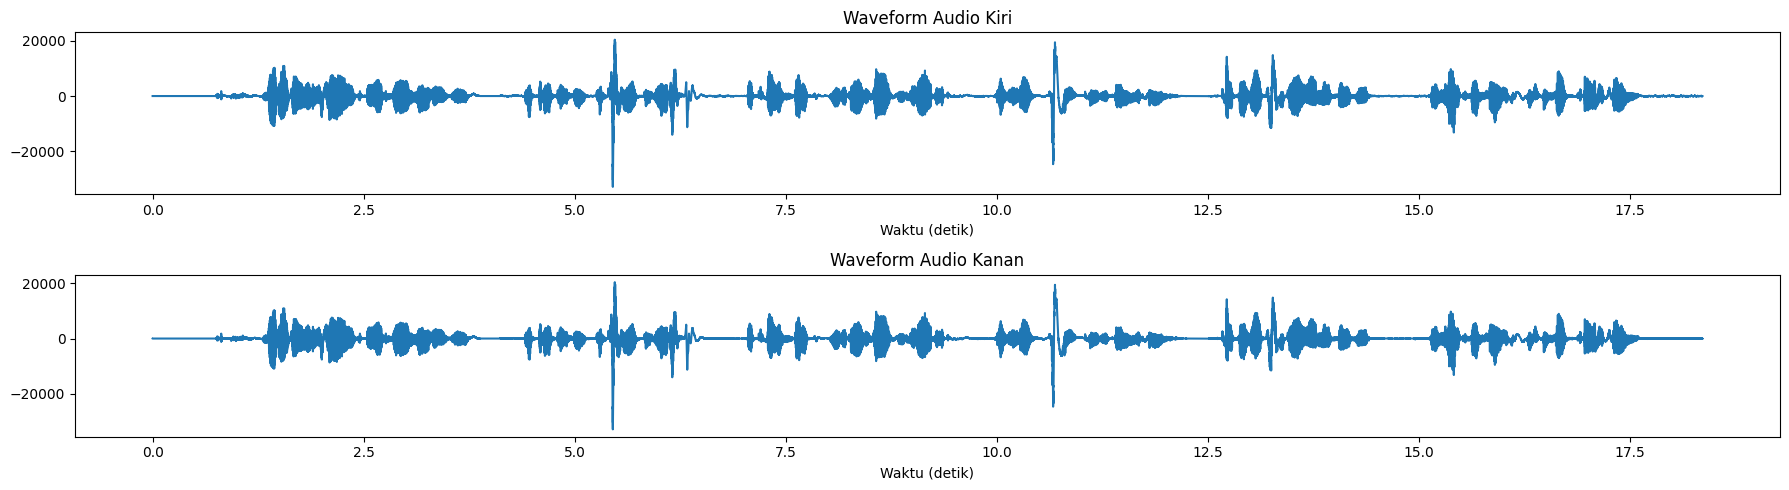

In [21]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(time_axis, data_audio_kiri, label='Kiri')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[1].plot(time_axis, data_audio_kanan, label='Kanan')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
plt.tight_layout()
plt.show()

Variabel `time_axis` adalah sumbu x yang akan digunakan untuk memvisualisasikan audio. Cara membuat `time_axis` adalah sebagai berikut:
- Tentukan panjang audio dalam detik dengan cara `panjang_audio = len(sound_data) / sampling_rate`.
- Buat array numpy yang berisi nilai waktu mulai dari 0 sampai panjang audio dengan cara `time_axis = np.linspace(0., panjang_audio, len(sound_data))`.


**Isi Daleman `sound_data`**

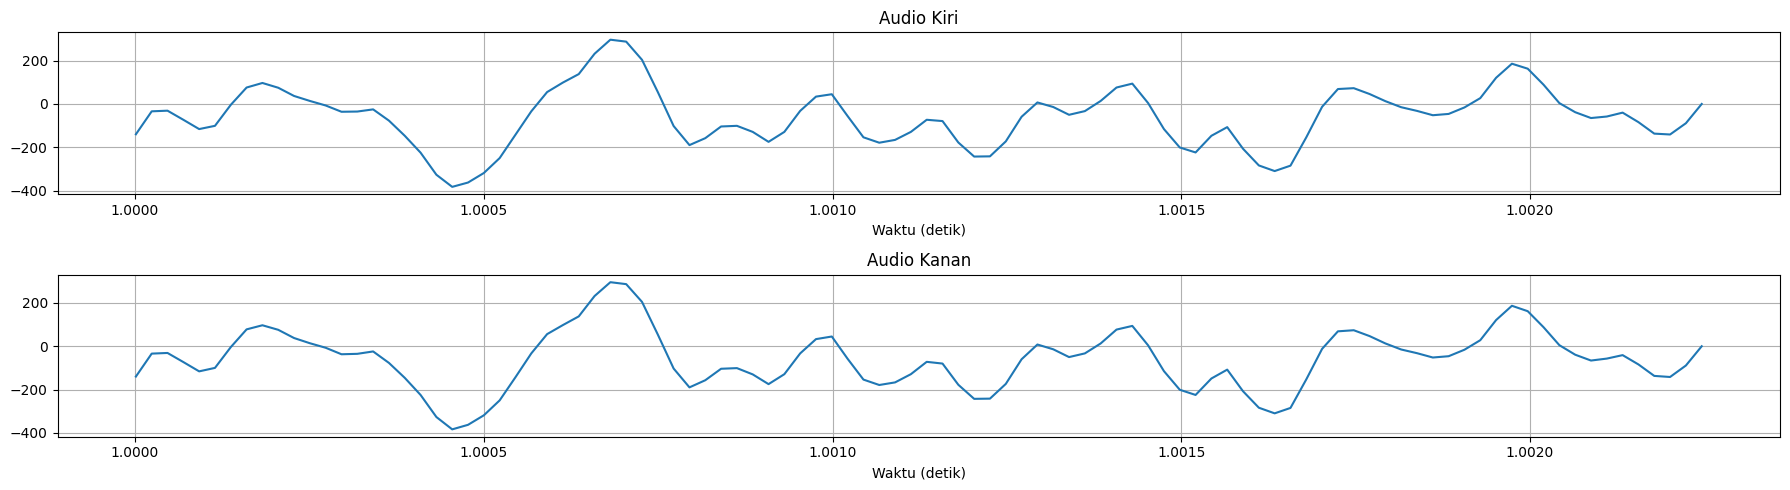

In [20]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(time_axis[44100:44200], data_audio_kiri[44100:44200], label='Kiri')
fig[0].set_title('Audio Kiri')
fig[0].set_xlabel('Waktu (detik)')
fig[0].grid()
fig[1].plot(time_axis[44100:44200], data_audio_kanan[44100:44200], label='Kanan')
fig[1].set_title('Audio Kanan')
fig[1].set_xlabel('Waktu (detik)')
fig[1].grid()
plt.tight_layout()
plt.show()

In [18]:
print(f"Data di dalam audio kiri pada sampel ke 44100-44200: {data_audio_kiri[44100:44200]}")
print(f"Data di dalam audio kanan pada sampel ke 44100-44200: {data_audio_kanan[44100:44200]}")

Data di dalam audio kiri pada sampel ke 44100-44200: [-140  -34  -31  -73 -116 -101   -4   76   97   75   37   14   -7  -36
  -35  -25  -77 -147 -225 -327 -383 -363 -319 -250 -142  -34   55   99
  138  232  297  288  204   55 -102 -190 -158 -104 -101 -129 -175 -129
  -32   34   45  -56 -154 -179 -166 -129  -73  -79 -178 -243 -242 -173
  -59    7  -14  -50  -33   14   76   94    4 -116 -201 -224 -147 -107
 -207 -284 -310 -285 -154  -13   69   73   46   13  -15  -32  -52  -46
  -16   27  121  186  163   89    4  -38  -65  -58  -40  -84 -137 -141
  -89    0]
Data di dalam audio kanan pada sampel ke 44100-44200: [-140  -34  -31  -73 -116 -100   -4   78   97   76   38   14   -7  -37
  -35  -24  -77 -146 -225 -327 -384 -363 -319 -250 -143  -33   56   98
  138  232  296  287  205   54 -103 -190 -157 -104 -101 -130 -175 -129
  -33   33   45  -58 -154 -179 -167 -129  -72  -80 -178 -243 -242 -174
  -60    8  -14  -50  -33   13   77   94    4 -115 -201 -225 -149 -108
 -208 -284 -310 -285 -153  -1

---

### Spectrogram

- Membutuhkan library `librosa` dan `librosa.display`

In [23]:
import librosa
import librosa.display

path audio: copy-paste dari atas

In [24]:
file_path = os.path.join(os.getcwd(), 'data', 'harvard.wav')

**Cara memuat audio di `librosa`**

In [31]:
data_audio, sr = librosa.load(file_path)
S = librosa.stft(data_audio)
S_db = librosa.amplitude_to_db(np.abs(S))

In [33]:
print(f"Sampling Rate: {sr}")

Sampling Rate: 22050


**Penjelasan:**
- fungsi `librosa.load(file_path)` digunakan untuk memuat audio. Dan mengembalikan dua buah return, yaitu:
    - `data_audio` : data audio.
    - `sr` : sampling rate dari audio.
- `librosa.stft` : digunakan untuk menghitung Short-Time Fourier Transform (STFT) dari audio.
- `librosa.amplitude_to_db` : digunakan untuk mengubah amplitudo audio menjadi decibel (dB).
- Sampling rate pada librosa menunjukkan hanya 1 channel saja sehingga berbeda dengan pembacaan `wave` (yaitu, 44100Hz)

**Menampilkan Spectrogram**

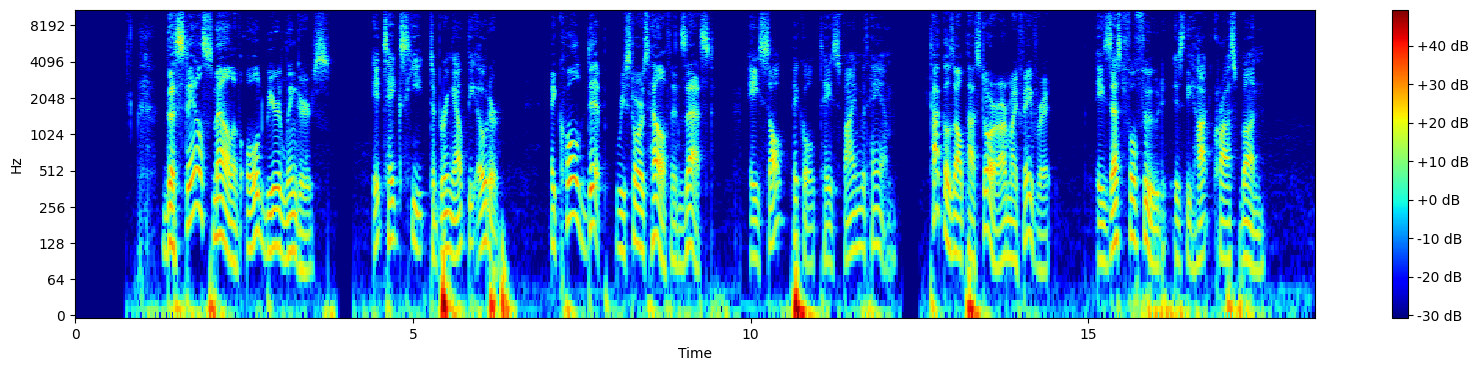

In [56]:
plt.figure(figsize=(20, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='jet')
plt.colorbar(format='%+2.0f dB')
plt.show()

**Penjelasan:**
- `librosa.display.specshow` : digunakan untuk menampilkan spektrogram audio.
    - `librosa.amplitude_to_db(np.abs(S))` : digunakan untuk mengubah amplitudo audio menjadi decibel (dB).
    - `sr=sr` : digunakan untuk menentukan sampling rate dari audio.
    - `x_axis='time'` : digunakan untuk menampilkan sumbu x (time-axis) dalam satuan waktu.
    - `y_axis='log'` : digunakan untuk menampilkan sumbu y (frequency-axis) dalam skala logaritmik.
- `plt.colorbar(format='%+2.0f dB')` : digunakan untuk menampilkan colorbar pada spektrogram audio.

**Apa itu Mel Spectrogram?**

Mel spectrogram adalah representasi visual dari spektrum frekuensi audio yang diubah menggunakan skala Mel. Skala Mel adalah skala frekuensi yang lebih sesuai dengan persepsi manusia terhadap suara. Manusia tidak mendengar frekuensi secara linier; kita lebih peka terhadap perubahan frekuensi di daerah bawah (rendah) daripada di daerah atas (tinggi). Oleh karena itu, skala Mel dirancang untuk mencerminkan bagaimana manusia sebenarnya mendengar.

**Mengapa Menggunakan Mel Spectrogram?**

Mel spectrogram sering digunakan dalam berbagai aplikasi pengolahan audio, seperti pengenalan suara, analisis musik, dan pemrosesan sinyal audio, karena lebih sesuai dengan persepsi pendengaran manusia. Beberapa kelebihan Mel spectrogram adalah:
- **Lebih representatif terhadap pendengaran manusia**: Membantu algoritma pengenalan suara dan musik bekerja lebih baik.
- **Pemisahan frekuensi yang lebih baik**: Lebih efektif dalam menunjukkan fitur penting dalam audio.

**Interpretasi Mel Spectrogram**

Pada Mel spectrogram:
- **Sumbu X**: Menunjukkan waktu.
- **Sumbu Y**: Menunjukkan frekuensi dalam skala Mel.
- **Warna**: Menunjukkan amplitudo atau kekuatan sinyal pada frekuensi dan waktu tertentu, diukur dalam dB (decibel).

Mel spectrogram memberikan representasi yang lebih jelas tentang bagaimana energi spektrum didistribusikan dalam frekuensi yang berbeda sesuai dengan pendengaran manusia. Ini sangat berguna untuk menganalisis pola suara, seperti formant dalam pengucapan atau nada dasar dalam musik.

---
## Trimming Audio (Memotong Audio)

Kita memuat ulang audio dengan `wave`

In [40]:
with wave.open(file_path, 'r') as wav_file:
    frames = wav_file.readframes(-1)
    sound_data = np.frombuffer(frames, dtype='int16')
    sampling_rate = wav_file.getframerate()
    
    # informasi channel
    n_channels = wav_file.getnchannels()
    
sound_data = sound_data.reshape(-1, n_channels)
print(f"Shape dari `sound_data` setelah di reshape: {sound_data.shape}")

Shape dari `sound_data` setelah di reshape: (809508, 2)


In [42]:
print(f"Isi dari audio kiri: {sound_data[:, 0]}")
print(f"Isi dari audio kanan: {sound_data[:, 1]}")

Isi dari audio kiri: [  0   0  -1 ... -57 -57 -61]
Isi dari audio kanan: [  0   1  -1 ... -57 -58 -60]


**Menghitung titik potong**

In [46]:
titik_awal_trim_second = 3
titik_akhir_trim_second = 6

titik_awal_trim_sampel = 3 * sampling_rate
titik_akhir_trim_sampel = 6 * sampling_rate

print(f"Titik Awal Trim Sampel: {titik_awal_trim_sampel} | Titik Akhir Trim Sampel: {titik_akhir_trim_sampel}")

Titik Awal Trim Sampel: 132300 | Titik Akhir Trim Sampel: 264600


**Melakukan Trimming**


Rumusnya adalah:
```python
variabel_baru = variabel_lama[start:end, :]
```

In [53]:
audio_trimmed = sound_data[titik_awal_trim_sampel:titik_akhir_trim_sampel, :]
time_axis_trimmed = time_axis[titik_awal_trim_sampel:titik_akhir_trim_sampel]

**Visualisasi**

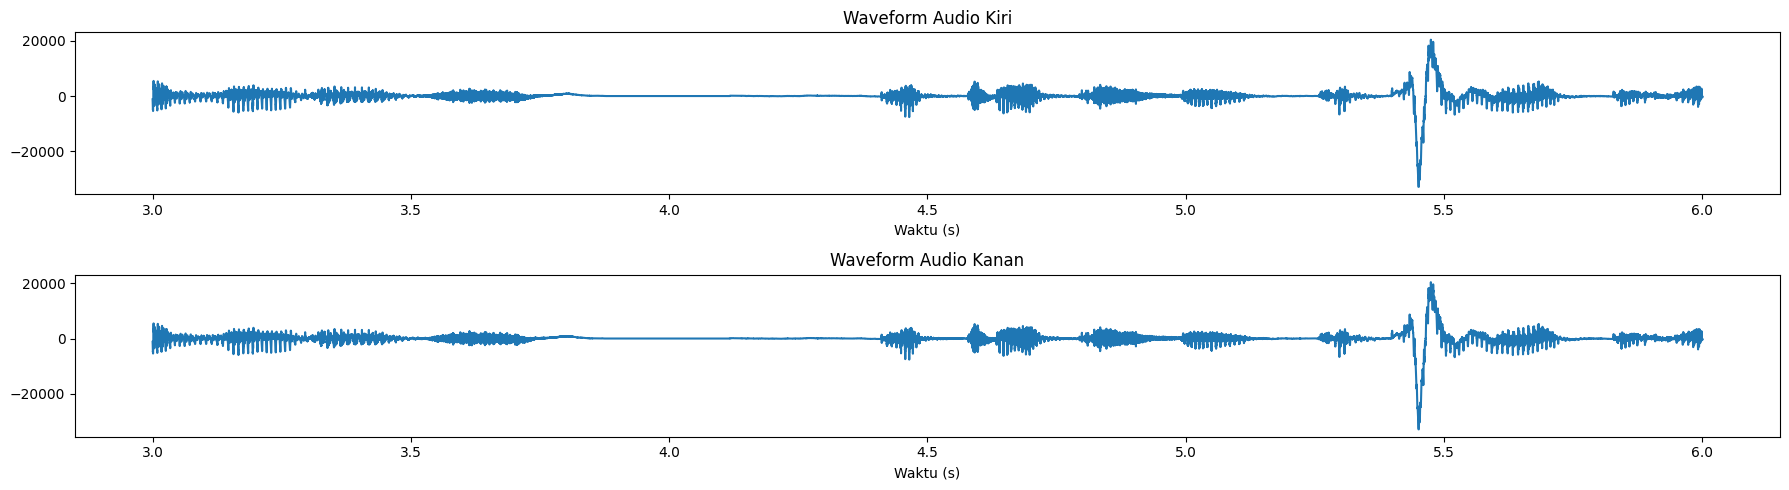

In [55]:
ax, fig = plt.subplots(2, 1, figsize=(18, 5)) # 2,1 artinya 2 baris, 1 kolom
fig[0].plot(time_axis_trimmed, audio_trimmed[:, 0], label='Kiri')
fig[0].set_title('Waveform Audio Kiri')
fig[0].set_xlabel('Waktu (s)')
fig[1].plot(time_axis_trimmed, audio_trimmed[:, 1], label='Kanan')
fig[1].set_title('Waveform Audio Kanan')
fig[1].set_xlabel('Waktu (s)')
plt.tight_layout()
plt.show()


---

## Tugas: `ho1`

1. Buktikan bahwa terdapat perbedaan yang signifikan pada visualisasi audio menggunakan 5 buah sumber audio yang berbeda:
    - Pertama, bersuara pelan. Kedua, relatif bersuara dengan volume sedang. Ketiga, relatif bersuara dengan volume tinggi. Keempat, bersuara volume sedang, namun mengucapkan kata-kata dengan huruf `s` yang panjang (`essssss`). Kelima, bersuara volume sedang, mengucapkan kata `brrbrbrbrb` / lip trill.
    - Masing-masing silahkan membuat file wav/mp3/flac yang sesuai dengan ketentuan tersebut (5 file).
    - Gunakan waveforms dan spectogram untuk memvisualisasikan ketiga sumber audio tersebut.
    - Berikan analisa anda terhadap perbedaan visualisasi audio tersebut.

### Ketentuan Penamaan File
```
nim_ho1.ipynb
```

> Saya sudah mendapatkan akses ke server [MOSS Stanford](https://theory.stanford.edu/~aiken/moss/) untuk menggunakan sistem mereka dalam mata kuliah ini untuk mendeteksi code yang "plagiat". Untuk menjamin bahwa code anda tidak terindikasi plagiarisme, silahkan gunakan nama variabel / parameter / dan konfigurasi yang unik dan tidak copy paste. Dan yang terpenting, berusahalah bekerja sendiri. Jika mendapat bantuan baik dari manusia maupun AI / web, segera cantumkan dalam bagian terakhir `ipynb` anda.

### Pengumpulan
- Unggah `.ipynb` ke repositori anda.
- Paste link dari file ke google form (bukan link repositori) pengumpulan tugas
- Export `.ipynb` menjadi `.pdf` dan unggah juga ke google form

Link yang di paste harus mirip dengan format berikut:
```
https://github.com/<username>/<kode_mk>/blob/master/<nim_ho1>.ipynb
```

- *Pastikan repo anda bersifat privat dan anda telah mengundang dosen pengampu ke repositori anda*
- Seluruh tugas untuk ho1 digabung dalam satu file notebook `.ipynb`
- Berikan penjelasan yang sedetail-detailnya untuk setiap bagian eksperimen yang anda lakukan

